

# Project: Investigate a Dataset (Analysing TMDB Movie Data )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **TMDB Movie Data**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue .
>
> **Questions :**
>
> * Whats is the most movie have revenues?
> 
> * what is the relation between geners and revenues ?
> 
> * whitch director contribute in most of them ?
>
> * whitch movie make profit ? max profit? min profit?


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In C:\Users\moamen_mohasseb\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\moamen_mohasseb\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\moamen_mohasseb\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\moamen_mohasseb\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\moamen_mohasseb\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
tmdb_df=pd.read_csv("tmdb-movies.csv")
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#review columns 
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# check is there any duplication
tmdb_df.duplicated().value_counts()

False    10865
True         1
dtype: int64

In [6]:
#
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)
> * Remove duplicate Data
> * Some columns we didnot need them [id,imdb_id,popularity]
> * Change data type of release_date  to be date time
> * Change data type of budget_adj and revenue_adj to be Integer as no need for fractions in millions no.
> * Although budget,revenue & budget_adj,revenue_adj has the same information but i will keep both of them as
we need budget,revenue as basic data and need budget_adj,revenue_adj for statistics purboses .
> * Drop all Rows whitch has budget_adj,revenue_adj less than 1000$  as the data seems to be wrong .
> * Some movies run time = 0 but we will do nothing as this column will be removed with rows with 0 budget .

In [7]:
# Make copy of data to clean
tmdb_df_cleaned=tmdb_df.copy()

In [8]:
#Drop duplicate values
tmdb_df_cleaned.drop_duplicates(inplace=True)

In [9]:
#drop columns that i will not use  [id,imdb_id,popularity]
tmdb_df_cleaned.drop(columns=['id','imdb_id','popularity'],inplace=True)

In [10]:
tmdb_df_cleaned.head(2)

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [11]:
#Change Data type of  release_date to date time
tmdb_df_cleaned['release_date']=pd.to_datetime(tmdb_df_cleaned['release_date'])
tmdb_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                10865 non-null  int64         
 1   revenue               10865 non-null  int64         
 2   original_title        10865 non-null  object        
 3   cast                  10789 non-null  object        
 4   homepage              2936 non-null   object        
 5   director              10821 non-null  object        
 6   tagline               8041 non-null   object        
 7   keywords              9372 non-null   object        
 8   overview              10861 non-null  object        
 9   runtime               10865 non-null  int64         
 10  genres                10842 non-null  object        
 11  production_companies  9835 non-null   object        
 12  release_date          10865 non-null  datetime64[ns]
 13  vote_count      

In [12]:
tmdb_df_cleaned.head(2)

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [13]:
#Change data type of budget_adj and revenue_adj to be Integer as no need for fractions in millions no.
col=['budget_adj','revenue_adj']
tmdb_df_cleaned[col]=tmdb_df_cleaned[col].astype(int)
tmdb_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                10865 non-null  int64         
 1   revenue               10865 non-null  int64         
 2   original_title        10865 non-null  object        
 3   cast                  10789 non-null  object        
 4   homepage              2936 non-null   object        
 5   director              10821 non-null  object        
 6   tagline               8041 non-null   object        
 7   keywords              9372 non-null   object        
 8   overview              10861 non-null  object        
 9   runtime               10865 non-null  int64         
 10  genres                10842 non-null  object        
 11  production_companies  9835 non-null   object        
 12  release_date          10865 non-null  datetime64[ns]
 13  vote_count      

In [14]:
tmdb_df_cleaned.head(2)

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292


In [15]:
# drop all data >1000$ in budget_adj and revenue_adj
tmdb_df_cleaned=tmdb_df_cleaned[(tmdb_df_cleaned['budget_adj']>1000) & (tmdb_df_cleaned['revenue_adj']>1000)]
tmdb_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 10848
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3815 non-null   int64         
 1   revenue               3815 non-null   int64         
 2   original_title        3815 non-null   object        
 3   cast                  3811 non-null   object        
 4   homepage              1412 non-null   object        
 5   director              3814 non-null   object        
 6   tagline               3542 non-null   object        
 7   keywords              3682 non-null   object        
 8   overview              3815 non-null   object        
 9   runtime               3815 non-null   int64         
 10  genres                3815 non-null   object        
 11  production_companies  3771 non-null   object        
 12  release_date          3815 non-null   datetime64[ns]
 13  vote_count       

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Whats is the The highest revenue and lowest movie has revenues?)

In [16]:
# movie with highest revenue
tmdb_df_cleaned[tmdb_df_cleaned['revenue_adj']==tmdb_df_cleaned['revenue_adj'].max()]

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9806,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,fishing|atlantic ocean|bathing|shipwreck|polic...,An insatiable great white shark terrorizes the...,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1975-06-18,1415,7.3,1975,28362748,1907005841


In [17]:
tmdb_df_cleaned['revenue_adj'].describe()

count    3.815000e+03
mean     1.357043e+08
std      2.017830e+08
min      1.840000e+03
25%      1.906670e+07
50%      6.244814e+07
75%      1.646599e+08
max      1.907006e+09
Name: revenue_adj, dtype: float64

In [18]:
# movie with lowest revenue
tmdb_df_cleaned[tmdb_df_cleaned['revenue_adj']==tmdb_df_cleaned['revenue_adj'].min()]

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4668,1500000,1938,Best Man Down,Justin Long|Jess Weixler|Tyler Labine|Addison ...,NaN,Ted Koland,NaN,NaN,A newlywed couple cancels their honeymoon and ...,90,Comedy|Drama,KODA Entertainment,2012-10-20,39,5.9,2012,1424616,1840


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000270C8D5D460>,
      dtype=object)

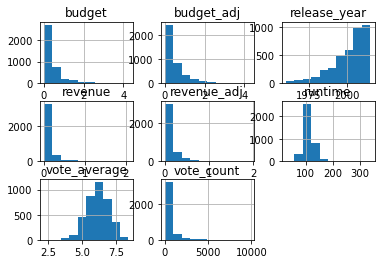

In [19]:
tmdb_df_cleaned.hist()

In [124]:
tmdb_df_cleaned['revenue_adj'].nlargest(10)

9806     1907005841
3        1902723129
8889     1791694309
8094     1583049536
10110    1574814739
4361     1443191435
7309     1424626187
0        1392445892
10223    1388863311
Name: revenue_adj, dtype: int32

In [125]:
tmdb_top_10_revenue=tmdb_df_cleaned[lambda x :x['revenue_adj'] >= 1385748801]
tmdb_top_10_revenue.head(2)

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919,1902723129


In [126]:
tmdb_df_cleaned['revenue_adj'].nsmallest(10)

10223    1388863311
0        1392445892
7309     1424626187
4361     1443191435
10110    1574814739
8094     1583049536
8889     1791694309
3        1902723129
9806     1907005841
Name: revenue_adj, dtype: int32

In [129]:
tmdb_min_10_revenue=tmdb_df_cleaned[lambda x :x['revenue_adj'] <= 1907005841]
tmdb_min_10_revenue

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919,1902723129
4361,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,new york|shield|marvel comic|comic|superhero,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012,208943741,1443191435
7309,18000000,538400000,The Empire Strikes Back,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,http://www.starwars.com/films/star-wars-episod...,Irvin Kershner,The Adventure Continues...,rebel|asteroid|space battle|snow storm|space c...,"The epic saga continues as Luke Skywalker, in ...",124,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1980-01-01,3954,8.0,1980,47628661,1424626187
8094,22000000,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,NaN,Irwin Winkler,Her driver's license. Her credit cards. Her ba...,cheating|new identity|computer virus|chase|com...,Angela Bennett is a freelance software enginee...,114,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,1995-07-28,201,5.6,1995,31481271,1583049536
8889,10500000,792910554,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,http://www.et20.com/,Steven Spielberg,He is afraid. He is alone. He is three million...,farewell|homesickness|nasa|extraterrestrial te...,A science fiction fairytale about an extra-ter...,115,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,1982-04-03,1830,7.2,1982,23726245,1791694309
9806,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,fishing|atlantic ocean|bathing|shipwreck|polic...,An insatiable great white shark terrorizes the...,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1975-06-18,1415,7.3,1975,28362748,1907005841
10110,4000000,215880014,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,NaN,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,puppy|animation|dog|dalmatian,When a litter of dalmatian puppies are abducte...,79,Adventure|Animation|Comedy|Family,Walt Disney Productions,2061-01-25,913,6.6,1961,29179444,1574814739
10223,63000000,920100000,Jurassic Park,Sam Neill|Laura Dern|Jeff Goldblum|Richard Att...,http://www.jurassicpark.com/,Steven Spielberg,An adventure 65 million years in the making.,exotic island|dna|paleontology|tyrannosaurus r...,A wealthy entrepreneur secretly creates a them...,127,Adventure|Science Fiction,Universal Pictures|Amblin Entertainment,1993-06-11,3169,7.4,1993,95096607,1388863311


In [134]:
#Function to plot relation between x , y
def plot_relation_rate(stage,xlabel,ylabel,message):
    type(stage)
    stage=stage.sort_values()
    plt.figure(figsize=(12, 7))
    plt.barh(stage.index,stage.array)
    plt.xlabel(xlabel, fontsize = 14)
    plt.title('relation between {} and {} {}'.format(xlabel,ylabel,message), fontsize = 16)
    #plt.gca().invert_yaxis()
    plt.show();

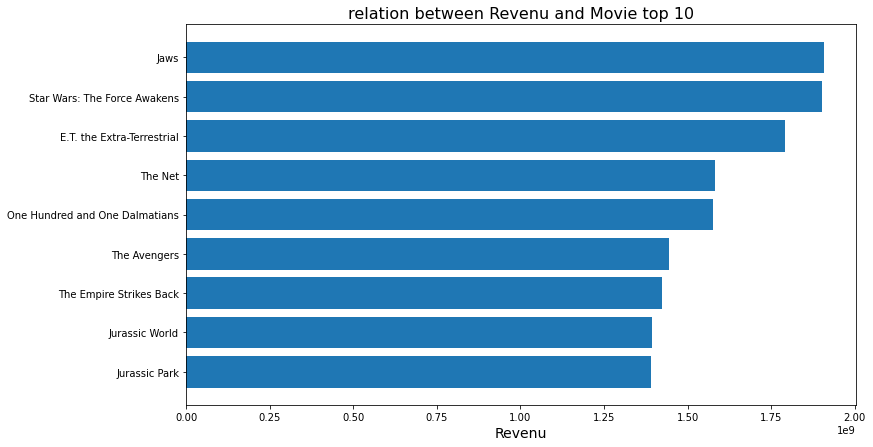

In [135]:
top_stage=tmdb_top_10_revenue.groupby(['original_title'])['revenue_adj'].sum()
top_stage.astype('int64')
plot_relation_rate(top_stage,'Revenu','Movie',"top 10")

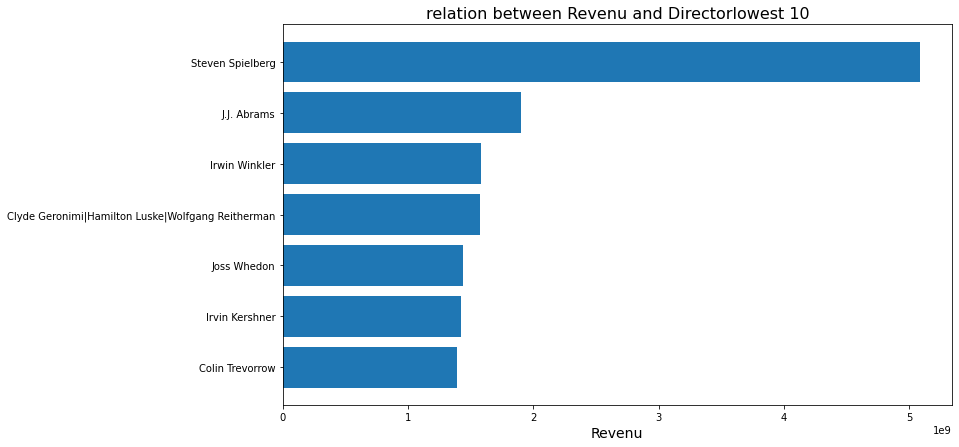

In [133]:
top_stage=tmdb_min_10_revenue.groupby(['director'])['revenue_adj'].sum()
top_stage.astype('int64')
plot_relation_rate(top_stage,'Revenu','Director',"lowest 10")

In [ ]:
top_stage=tmdb_top_10_revenue.groupby(['director'])['revenue_adj'].sum()
top_stage.astype('int64')
plot_relation_rate(top_stage,'Revenu','Director')

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!